In [1]:
#importing libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading my dataset
df = pd.read_csv("census_income.csv")

In [3]:
#printing first 5 records
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
#printing my cloumn names
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
#info of my dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#checking null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
#shape of my dataset
df.shape

(32560, 15)

In [8]:
#unique features in my dataset
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [9]:
#statistical view of my dataset
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
#Looping my object coulmns and printing all my nunique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' +str(df[column].nunique()))
        print(df[column].value_counts())
        print('_______________________________________________')

Workclass : 9
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
_______________________________________________
Education : 16
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
_______________________________________________
Marital_status : 7
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent   

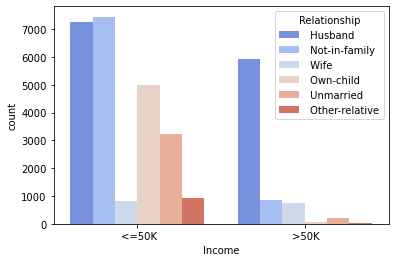

In [11]:
#countplot of diffrent condition
sns.countplot(df['Income'], palette='coolwarm', hue='Relationship', data=df);

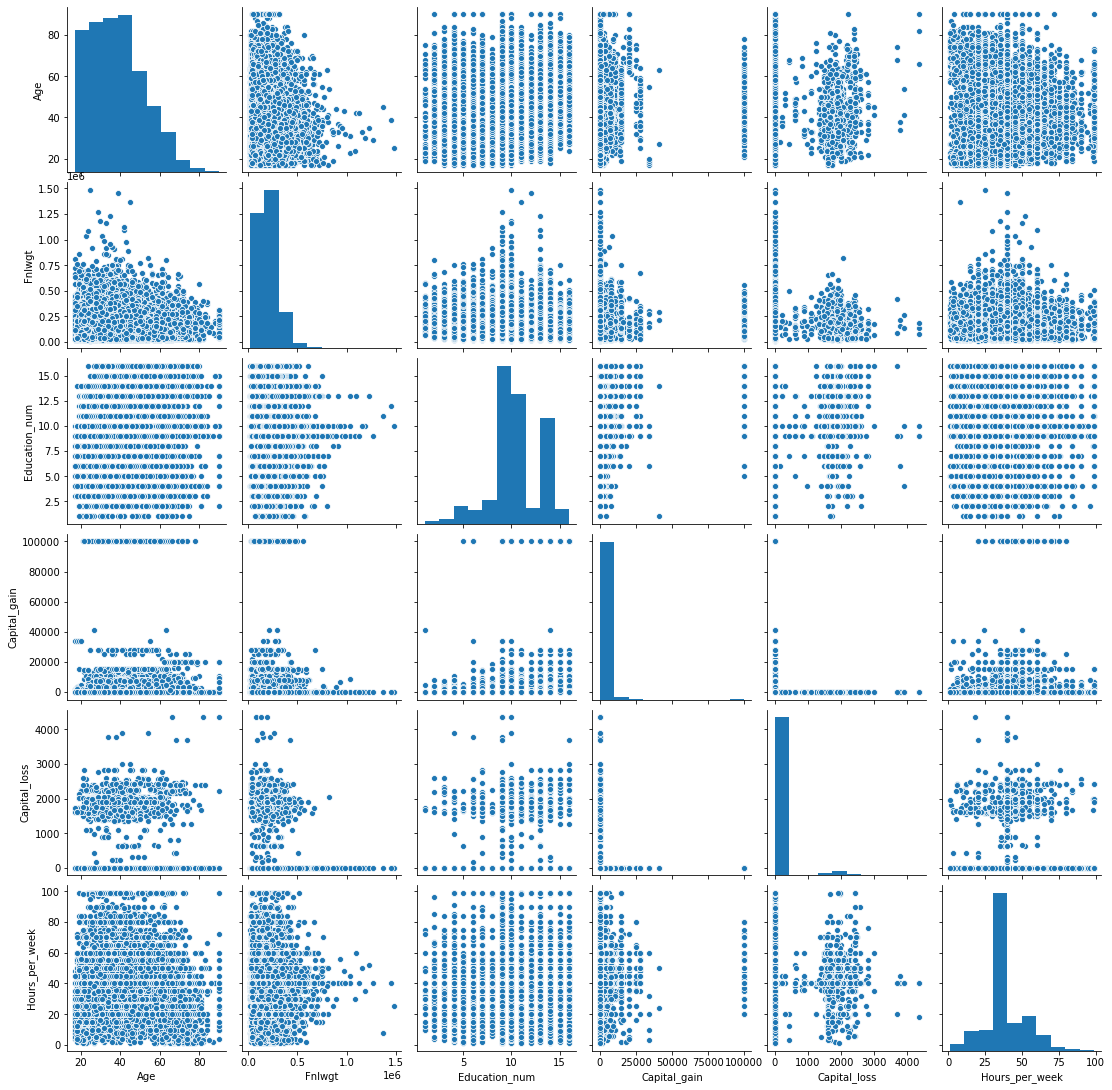

In [12]:
#pairplot view
sns.pairplot(df)

# Feature Engineering

In [13]:
#filling '?' with values
df['Workclass'] = df['Workclass'].replace('?', 'Private')
df['Occupation'] = df['Occupation'].replace('?', 'Prof-specialty')
df['Native_country'] = df['Native_country'].replace('?', 'United-States')

In [14]:
# education Category
df.Education= df.Education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
df.Education = df.Education.replace('HS-grad', 'high school')
df.Education = df.Education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
df.Education = df.Education.replace('Bachelors', 'undergrad')
df.Education = df.Education.replace('Masters', 'grad')
df.Education = df.Education.replace('Doctorate', 'doc')

In [15]:
#martial status
df['Marital_status']= df['Marital_status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
df['Marital_status']= df['Marital_status'].replace(['Never-married'], 'not-married')
df['Marital_status']= df['Marital_status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other')

In [16]:
# income
df.Income = df.Income.replace('<=50K', 0)
df.Income = df.Income.replace('>50K', 1)

In [17]:
#correlation matrix
corr_mat = df.corr()

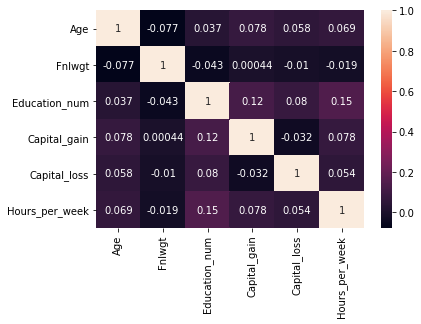

In [18]:
#heatmap for my corr_mat
sns.heatmap(corr_mat, annot=True);

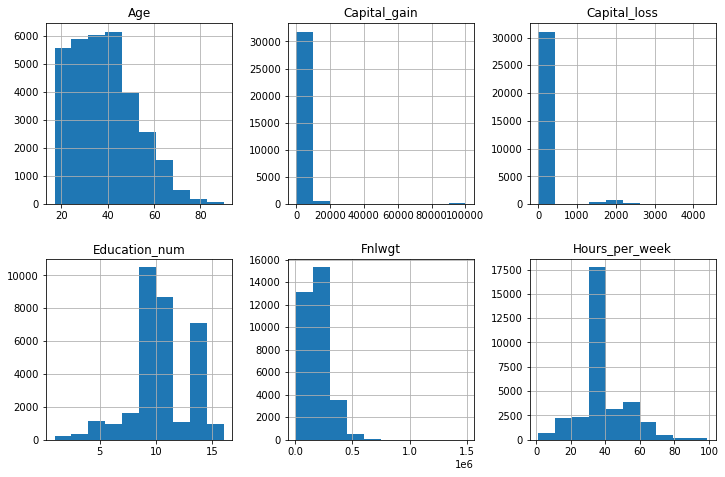

In [19]:
#histogram for my dataset
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

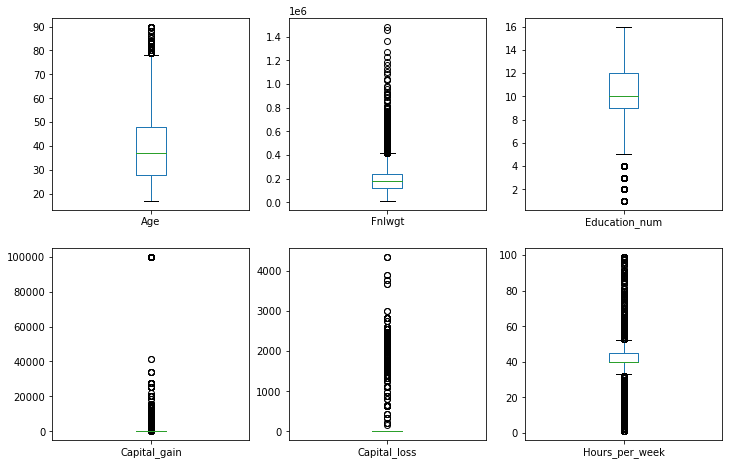

In [20]:
#boxplot to remove outliers
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

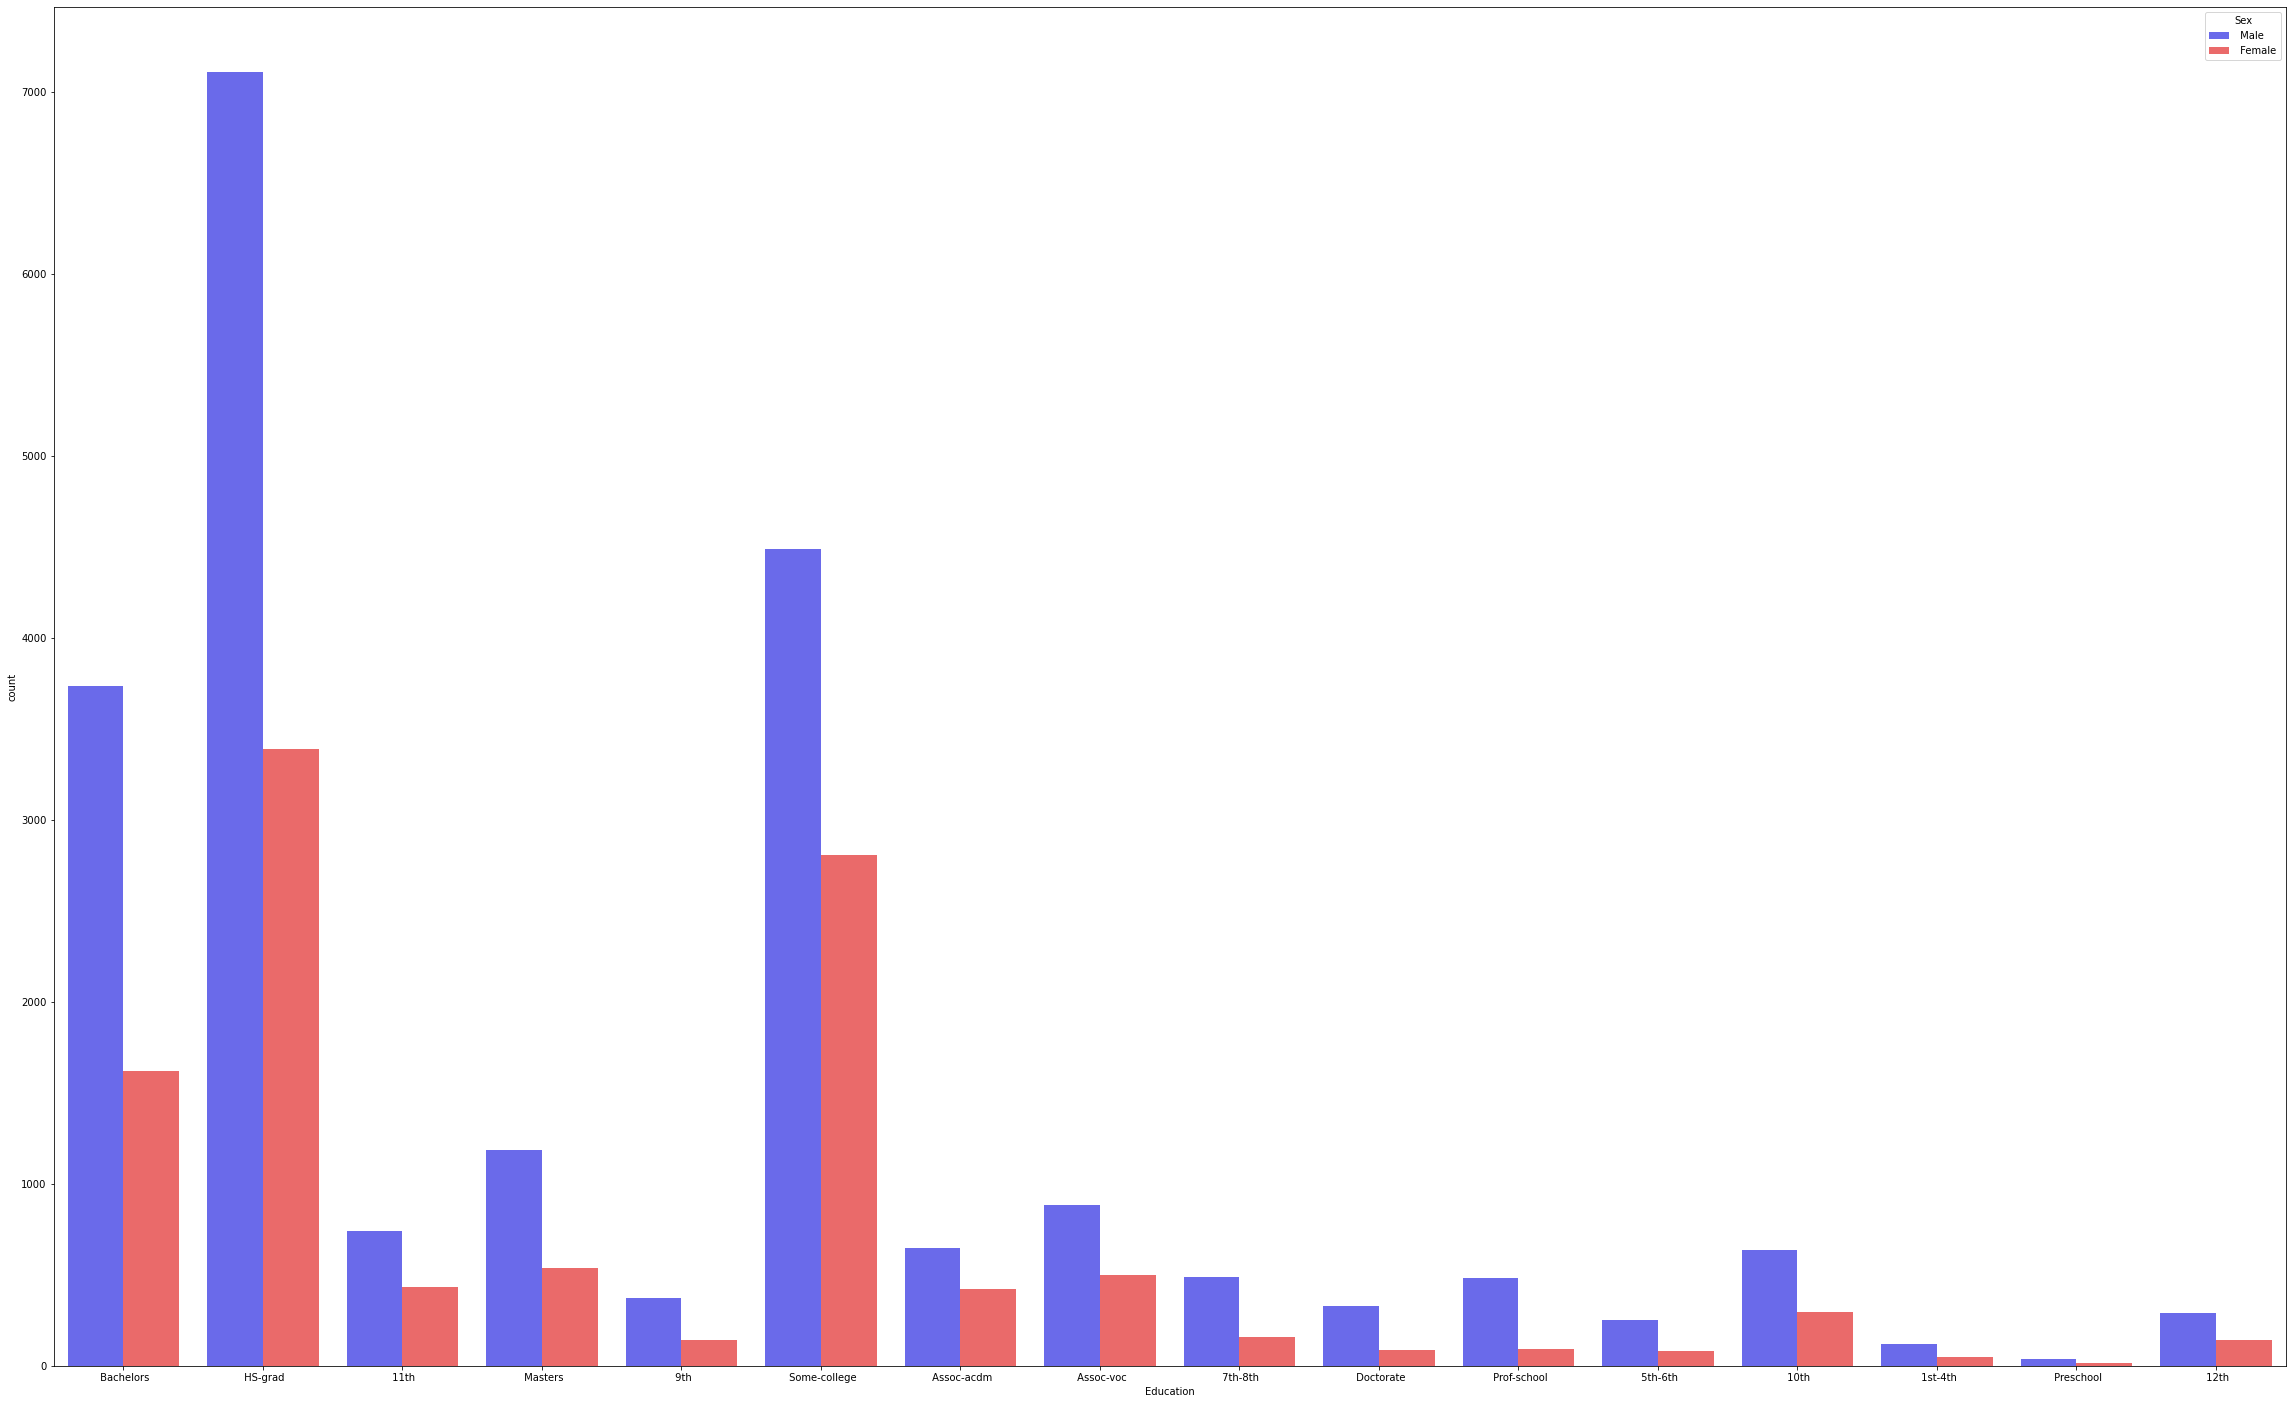

In [21]:
#countplot
plt.figure(figsize=(40,25),facecolor="white")
sns.countplot(df['Education'], hue='Sex', data=df, palette='seismic');

In [22]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [23]:
#encoding my dataset for categorical variables
df1= df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,2925,9,12,2,4,0,4,1,0,0,12,39,0
1,21,4,14085,11,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,1,6,2,6,0,2,1,0,0,39,39,0
3,11,4,19354,9,12,2,10,5,2,0,0,0,39,5,0
4,20,4,17699,12,13,2,4,5,4,0,0,0,39,39,0


In [24]:
#Removing Outliers
from scipy import stats

z = np.abs(stats.zscore(df1))
index = (np.where(z > 3)[0])

df1 = df1.drop(df1.index[index])

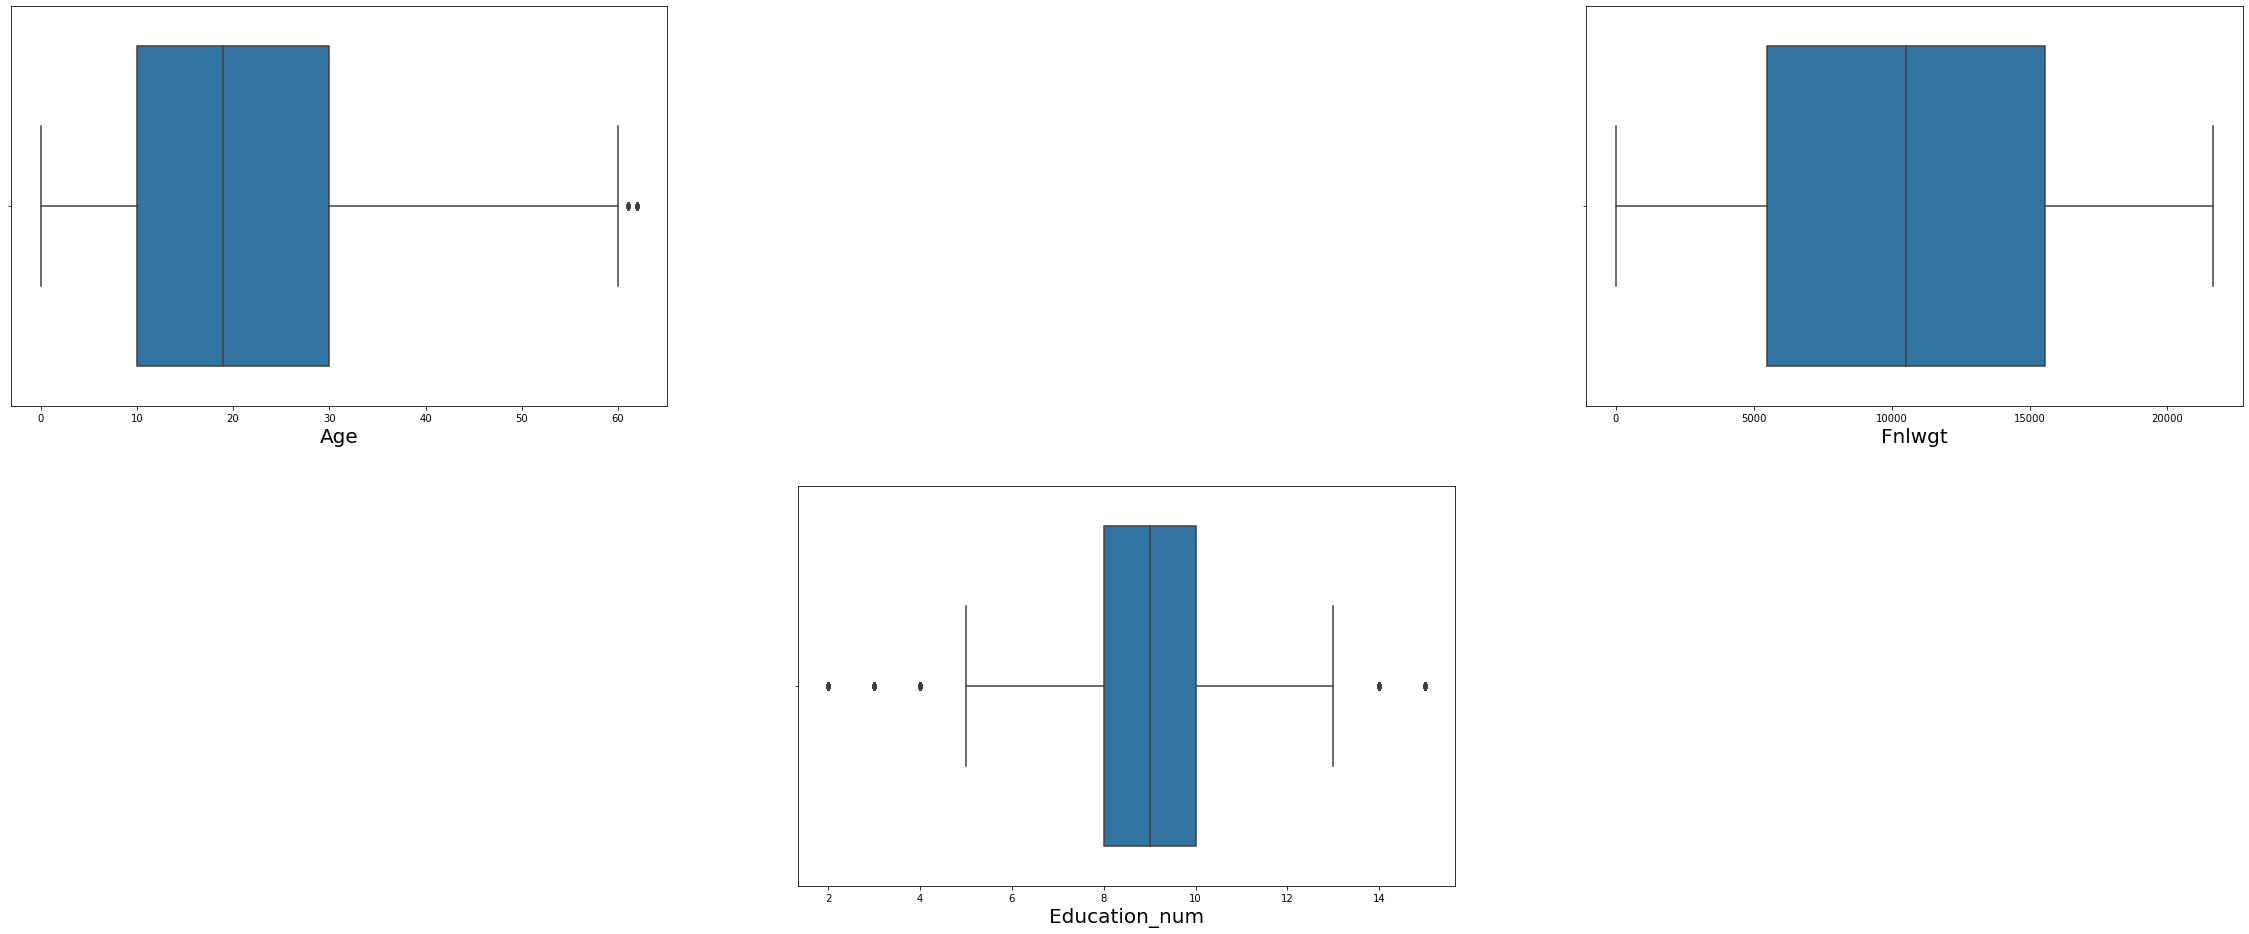

In [25]:
#plotting distribution plot for my dataframe removing outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df1:
    
    if(df1[column].dtype == np.float64 or df1[column].dtype == np.int64):
        if plotnumber<=9:
            ax = plt.subplot(3,3,plotnumber)
            sns.boxplot(df1[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [26]:
#scaling mydata
ss= StandardScaler().fit_transform(df1.drop('Income', axis=1))

In [27]:
#splitting mydataset
X= df1.drop(['Income'], axis=1)
y = df1['Income']

In [28]:
#checking for is there any VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = ss

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [29]:
vif

,VIF,Features
0,1.174871,Age
1,1.090026,Workclass
2,1.031926,Fnlwgt
3,1.158347,Education
4,1.216984,Education_num
5,1.141882,Marital_status
6,1.090535,Occupation
7,1.650598,Relationship
8,1.052499,Race
9,1.522469,Sex


In [30]:
#splitting my data to train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ss, y, test_size=0.3, random_state=40)

In [31]:
#linear regreession model build
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

lr = LogisticRegression()

model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [32]:
#Metrics for my model
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_pred)) #for confusion matrix
print('-'*40)
LR_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of Logistic Regression :{:.2f}'.format(LR_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(y_test,y_pred)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[6199  289]
 [1106  427]]
----------------------------------------
Accuracy of Logistic Regression :0.83
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      6488
           1       0.60      0.28      0.38      1533

    accuracy                           0.83      8021
   macro avg       0.72      0.62      0.64      8021
weighted avg       0.80      0.83      0.80      8021

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [33]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score
#Cross Validation  for LR
a =cross_val_score(lr,ss,y,cv=5).mean()
b = LR_accuracy

b-a

-0.003205914938967047

In [36]:
#builiding KNN classifier and metrics to be validate my KNN
from sklearn.neighbors import KNeighborsClassifier
# k=3
knn = KNeighborsClassifier(n_neighbors = 3)  #Instantiate KNN with k=3
knn.fit(X_train,y_train) #Call the fit method of KNN to train the model or to learn the parameters of model
y_predict = knn.predict(X_test) #Predict 

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_predict)) #for confusion matrix
print('-'*30)
KNN_accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of KNN :{:.2f}'.format(KNN_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,y_predict)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[5868  620]
 [ 767  766]]
------------------------------
Accuracy of KNN :0.83
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      6488
           1       0.55      0.50      0.52      1533

    accuracy                           0.83      8021
   macro avg       0.72      0.70      0.71      8021
weighted avg       0.82      0.83      0.82      8021

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [37]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score
#Cross Validation  for KNN
a =cross_val_score(knn,ss,y,cv=5).mean()
b = KNN_accuracy

b-a

0.0017937111827291963

In [38]:
#Bulding SVC and metrics to be validated
from sklearn.svm import SVC
svc = SVC()  #Instantiate SVC
svc.fit(X_train,y_train) #Call the fit method of SVC to train the model or to learn the parameters of model
predicted_svc = svc.predict(X_test) #Predict 

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_svc)) #for confusion matrix
print('-'*30)
SVC_accuracy = accuracy_score(y_test,predicted_svc) #for accuracy score
print('Accuracy of SVC :',SVC_accuracy)
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_svc)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[6226  262]
 [ 962  571]]
------------------------------
Accuracy of SVC : 0.8474005734945768
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      6488
           1       0.69      0.37      0.48      1533

    accuracy                           0.85      8021
   macro avg       0.78      0.67      0.70      8021
weighted avg       0.83      0.85      0.83      8021

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [39]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score
#Cross Validation  for SVC
a =cross_val_score(svc,ss,y,cv=5).mean()
b = SVC_accuracy

b-a

0.001243850098279764

In [40]:
#Bulding RF and metrics to be validated
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()  #Instantiate RF
rf.fit(X_train,y_train) #Call the fit method of RF to train the model or to learn the parameters of model
predicted_rf = rf.predict(X_test) #Predict 

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_rf)) #for confusion matrix
print('-'*30)
rf_accuracy = accuracy_score(y_test,predicted_rf) #for accuracy score
print('Accuracy of rf :',rf_accuracy)
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_rf)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[6049  439]
 [ 774  759]]
------------------------------
Accuracy of rf : 0.8487719735693804
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      6488
           1       0.63      0.50      0.56      1533

    accuracy                           0.85      8021
   macro avg       0.76      0.71      0.73      8021
weighted avg       0.84      0.85      0.84      8021

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [41]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score
#Cross Validation  for RF
a =cross_val_score(rf,ss,y,cv=5).mean()
b = rf_accuracy

b-a

0.001867167135866321

In [42]:
#Bulding AB and metrics to be validated
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()  #Instantiate AB
ab.fit(X_train,y_train) #Call the fit method of AB to train the model or to learn the parameters of model
predicted_ab = ab.predict(X_test) #Predict 

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_ab)) #for confusion matrix
print('-'*30)
ab_accuracy = accuracy_score(y_test,predicted_ab) #for accuracy score
print('Accuracy of ab :',ab_accuracy)
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_ab)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[6143  345]
 [ 785  748]]
------------------------------
Accuracy of ab : 0.8591198104974442
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      6488
           1       0.68      0.49      0.57      1533

    accuracy                           0.86      8021
   macro avg       0.79      0.72      0.74      8021
weighted avg       0.85      0.86      0.85      8021

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [43]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score
#Cross Validation  for AB
a =cross_val_score(ab,ss,y,cv=5).mean()
b = ab_accuracy

b-a

0.0026769453394117626

In [44]:
#Bulding DTC and metrics to be validated
from sklearn.tree import DecisionTreeClassifier
ds = DecisionTreeClassifier()  #Instantiate DTC
ds.fit(X_train,y_train) #Call the fit method of DTC to train the model or to learn the parameters of model
predicted_ds = ds.predict(X_test) #Predict 

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_ds)) #for confusion matrix
print('-'*30)
ds_accuracy = accuracy_score(y_test,predicted_ds)#for accuracy score
print('Accuracy of ds :',ds_accuracy)
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_ds)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[5642  846]
 [ 810  723]]
------------------------------
Accuracy of ds : 0.7935419523750156
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      6488
           1       0.46      0.47      0.47      1533

    accuracy                           0.79      8021
   macro avg       0.67      0.67      0.67      8021
weighted avg       0.80      0.79      0.79      8021

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [45]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score
#Cross Validation  for DTC
a =cross_val_score(ds,ss,y,cv=5).mean()
b = ds_accuracy

b-a

-0.0037649486910028562

# Hyperparameter Tuning

In [46]:
from sklearn.model_selection import GridSearchCV
grid_params = {    'n_estimators': [100,200,300]}
grid_object = GridSearchCV(estimator = ab, param_grid = grid_params, scoring = 'accuracy', cv = 3, n_jobs = -1)#Fitting the grid to the training 
grid_object.fit(X_train, y_train)#Extracting the best 
grid_object.best_params_

{'n_estimators': 200}

In [47]:
#Bulding AB and metrics to be validated
from sklearn.ensemble import AdaBoostClassifier
ab1 = AdaBoostClassifier(n_estimators=300)  #Instantiate AB
ab1.fit(X_train,y_train) #Call the fit method of AB to train the model or to learn the parameters of model
predicted_ab1 = ab1.predict(X_test) #Predict 

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_ab1)) #for confusion matrix
print('-'*30)
ab1_accuracy = accuracy_score(y_test,predicted_ab1) #for accuracy score
print('Accuracy of ab :',ab1_accuracy)
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_ab1)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[6108  380]
 [ 731  802]]
------------------------------
Accuracy of ab : 0.8614885924448323
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      6488
           1       0.68      0.52      0.59      1533

    accuracy                           0.86      8021
   macro avg       0.79      0.73      0.75      8021
weighted avg       0.85      0.86      0.85      8021

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


# After hyperparameter got to know Adaboost is my best model so saving the same in pickle file

In [48]:
#Saving the model in pkl file
import joblib
joblib.dump(ab1,"census.pkl")

model = joblib.load("census.pkl")

#Predicting the saved model
prediction = model.predict(X_test)

#Converting the result into DataFrame
prediction = pd.DataFrame(prediction)

#Saving the result into CSV
prediction.to_csv("census.csv",index=False)

